# CascadeTabNet Demo Notebook


## 1. Install all the prerequisite
This will take a while, Remember to **Restart Runtime** after this step is done 

In [ ]:
!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv terminaltables
!git clone --branch v1.2.0 'https://github.com/open-mmlab/mmdetection.git'
%cd "mmdetection"
!pip install -r "/content/mmdetection/requirements/optional.txt"
!python setup.py install
!python setup.py develop
!pip install -r {"requirements.txt"}
!pip install pillow==6.2.1 
!pip install mmcv==0.4.3
%cd "/content"

Streaming output truncated to the last 5000 lines.
                 from /usr/local/lib/python3.7/dist-packages/torch/include/ATen/ATen.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/types.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader_options.h:4,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/base.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/stateful.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/all.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.2 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 6.2.2
    Uninstalling Pillow-6.2.2:
      Successfully uninstalled Pillow-6.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 6.2.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.8 MB/s 
  Created wheel for mmcv: filename=mmcv-0.4.3-cp37-cp37m-linux_x86_64.whl size=172747 sha256=e99cf2431b951b0bebb13f8694e59e51fdaaa88e6841a334aa98a3c9f0c4bfb4
  Stored in directory: /root/.cache/pip/wheels/0e/d1/95/11a3b3bfc1a6b81059a407214e7bb84fdbf6ecfd292a298e9f
Successfully built mmcv
  Attempting uninstall: mmcv
    Found existing installation: mmcv 1.5.1
    Uninstalling mmcv-1.5.1:
      Successfully uninstalled mmcv-1.5.1
/content


In [ ]:
!pip uninstall opencv-python-headless 
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

## 2. Clone the Repository 
We will be using "ICDAR 19 (Track B2 Modern) table structure recognition" for demo

In [ ]:
!git clone https://github.com/DevashishPrasad/CascadeTabNet.git

Cloning into 'CascadeTabNet'...
remote: Enumerating objects: 675, done.
remote: Total 675 (delta 0), reused 0 (delta 0), pack-reused 675
Receiving objects: 100% (675/675), 16.55 MiB | 35.31 MiB/s, done.
Resolving deltas: 100% (328/328), done.


## 3. Download the Pretrained Model



In [ ]:
!gdown "https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT"

Downloading...
From: https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT
To: /content/epoch_36.pth
100% 664M/664M [00:04<00:00, 140MB/s] 


In [ ]:
#!gdown "https://drive.google.com/u/0/uc?id=1-vjfGRhF8kqvKwZPPFNwiTaOoonJlGgv"

## 4. Run the Predictions

In [ ]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import json
import os

In [ ]:
def optimised_iou(bbox1, bbox2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes, if 
    bbox1 is text bbox， 左下点+ 右上点
    bbox2 is table bbox 左上角（x,y) + 右下角（x，y）

    bb1,bb2左上，右下
    """
    bb1 = {}
    bb2 = {}
    bb1['x1'] = bbox1[0]
    bb1['y1'] = bbox1[3]
    bb1['x2'] = bbox1[2]
    bb1['y2'] = bbox1[1]

    bb2['x1'] = bbox2[0]
    bb2['y1'] = bbox2[1]
    bb2['x2'] = bbox2[2]
    bb2['y2'] = bbox2[3]
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    #if completely inside
    # If top-left inner box corner is inside the bounding box
    if bb2['x1'] <= bb1['x1'] and bb2['x2'] >= bb1['x2'] and bb2['y1'] <= bb1['y1'] and bb2['y2'] >= bb1['y2']:
      return 1




    # determine the coordinates of the intersection rectangle
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [ ]:
#hyperparameters
table_box_confidence = 0.8
iou_threshold = 0.5



# Load model
config_file = '/content/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')


json_path = '/content/labeled_dataset.json' #dataset json file
# json_path = '/content/drive/MyDrive/cap2/dataset_annotated.json' #dataset json file
with open(json_path) as f:
  json_list = json.load(f)
  file_names = json_list.keys()
  for file in file_names:
    for page in json_list[file]['pages']:
      img_name = json_list[file]['pages'][page]['page_name']
      img_path = os.path.join('/content/drive/MyDrive/cap2/COMP5703_dataset',img_name)
      result = inference_detector(model, img_path)
      
      for obj in json_list[file]['pages'][page]['objects']:
        for sub_obj in json_list[file]['pages'][page]['objects'][obj]['sub_obj']:
          text_box = json_list[file]['pages'][page]['objects'][obj]['sub_obj'][sub_obj]['coord']
          for table_box in result[0][0]:
              if table_box[-1] >= table_box_confidence:
                if optimised_iou(text_box, table_box[:-1]) > iou_threshold:
                    if json_list[file]['pages'][page]['objects'][obj]['sub_obj'][sub_obj]['label'] == 'text':
                      json_list[file]['pages'][page]['objects'][obj]['sub_obj'][sub_obj]['label'] = 'table'
                      # print(file, page, obj)
                      
                    else:
                      print("warning")
                    break


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning


In [ ]:
# #hyperparameters
# table_box_confidence = 0.8
# iou_threshold = 0.5



# # Load model
# config_file = '/content/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
# checkpoint_file = '/content/epoch_36.pth'
# model = init_detector(config_file, checkpoint_file, device='cuda:0')


# json_path = '/content/drive/MyDrive/cap2/dataset_annotated.json' #dataset json file
# with open(json_path) as f:
#   json_list = json.load(f)
#   file_names = json_list.keys()
#   for file in file_names:
#     for page in json_list[file]['pages']:
#       img_name = json_list[file]['pages'][page]['page_name']
#       img_path = os.path.join('/content/drive/MyDrive/cap2/COMP5703_dataset',img_name)
#       result = inference_detector(model, img_path)
      
#       for obj in json_list[file]['pages'][page]['objects']:
#         text_box = json_list[file]['pages'][page]['objects'][obj]['lt_obj']
#         for table_box in result[0][0]:
#             if table_box[-1] >= table_box_confidence:
#               if optimised_iou(text_box, table_box[:-1]) > iou_threshold:
#                   json_list[file]['pages'][page]['objects'][obj]['sub_obj']['label'] = 'table'
#                   # print(file, page, obj)
#                   break


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [ ]:
#write changed dataset json file to a new file
with open('/content/dataset_with_four_labels.json', 'w') as f2:
  json.dump(json_list,f2)

# Debug code

In [ ]:
result[0][0] #左上角（x,y) + 右下角（x，y）

array([[ 49.023624  , 610.5505    , 543.2216    , 700.2852    ,
          0.99951947],
       [ 47.8953    , 464.19284   , 538.9825    , 521.92126   ,
          0.99601483]], dtype=float32)

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import json
import os
try:
  image = Image.open(img_path)
except OSError as error : 
    print(error)
image = image.convert("RGB")
draw = ImageDraw.Draw(image, "RGBA")
font = ImageFont.load_default()
for obj in json_list[file]['pages'][page]['objects']:
  annotation = json_list[file]['pages'][page]['objects'][obj]
  label = obj
  x = annotation['lt_obj'][0]
  y = annotation['lt_obj'][1]
  w = annotation['lt_obj'][2]
  h = annotation['lt_obj'][3] 
  general_box = [x,y,w,h]
  # print(general_box, label)

  for table_box in result[0][0]:
    print(optimised_iou(general_box, table_box[:-1]), label)


  draw.rectangle(general_box,outline='red')
  draw.rectangle(result[0][0][0][:-1],outline='green')




  draw.text((annotation['lt_obj'][0]-15 , annotation['lt_obj'][3]), label,fill = 'blue')
# print(result[0][0][0][:-1])
image

[Errno 5] Input/output error: '/content/drive/MyDrive/cap2/COMP5703_dataset/01666346-0.png'


NameError: ignored

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


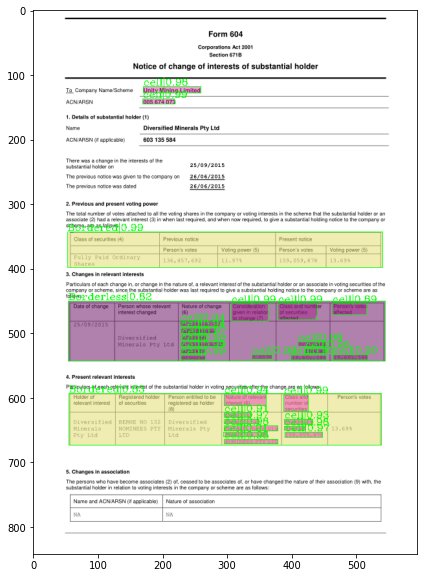

In [ ]:
result = inference_detector(model, img_path)
show_result_pyplot(img_path, result,('Bordered','cell', 'Borderless'), score_thr=0.8)

In [ ]:
print(result)

([array([], shape=(0, 5), dtype=float32), array([[1.87122223e+02, 1.43653931e+02, 2.54885986e+02, 1.62125107e+02,
        9.98368442e-01],
       [9.79892273e+01, 1.54848206e+02, 1.19555046e+02, 1.62636856e+02,
        9.95044112e-01],
       [1.85965668e+02, 2.43624573e+02, 2.52895966e+02, 2.52569901e+02,
        9.74375248e-01],
       [1.85748108e+02, 2.60566132e+02, 2.53168488e+02, 2.69624634e+02,
        9.73011911e-01],
       [1.85649017e+02, 2.25976532e+02, 2.53156891e+02, 2.34533295e+02,
        9.81371105e-01],
       [1.00088600e+02, 2.60364838e+02, 1.18090897e+02, 2.69049866e+02,
        9.89800036e-01],
       [9.99696884e+01, 2.78015900e+02, 1.18030113e+02, 2.86363312e+02,
        9.90428090e-01],
       [1.85725861e+02, 2.78242188e+02, 2.52831451e+02, 2.87286072e+02,
        9.33484375e-01],
       [9.99921112e+01, 2.43205490e+02, 1.17207230e+02, 2.51880524e+02,
        9.84713137e-01],
       [1.86563828e+02, 1.87596710e+02, 2.51081848e+02, 2.36663071e+02,
        5.613

**Note :** If you are getting "no module name mmdet" error, Please Restart the runtime by pressing "Crtl+M" OR going to the runtime (5th option, top left) and selecting Restart Runtime.

After this, use TSR postprocessing for best result

In [ ]:
import sys

sys.path.append('/content/CascadeTabNet/Table Structure Recognition')

In [ ]:
from border import border
from mmdet.apis import inference_detector, show_result, init_detector
import cv2
from Functions.blessFunc import borderless
import lxml.etree as etree
import glob
import numpy as np

In [ ]:
gray = cv2.cvtColor(np.asarray(img), cv2.COLOR_BGR2GRAY)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, 1)
bw = cv2.bitwise_not(bw)

In [ ]:
import json
import os


json_path = '/content/dataset_with_table (1).json' #dataset json file

final_path= '/content/labeled_dataset.json'


with open(json_path) as f:
  with open(final_path) as f2:
    json_list = json.load(f)
    final_list = json.load(f2)


    file_names = json_list.keys()
    for file in file_names:
      for page in json_list[file]['pages']:
        for obj in json_list[file]['pages'][page]['objects']:
          # text_box = json_list[file]['pages'][page]['objects'][obj]['lt_obj']
          print(final_list[file]['pages'][page]['objects'][obj]['sub_obj']['0'].keys())
          # if json_list[file]['pages'][page]['objects'][obj]['sub_obj']['0']['label'] == 'table':
          #   print(final_list[file]['pages'][page]['objects'][obj]['sub_obj']['label'])

          # for table_box in result[0][0]:
          #     if table_box[-1] >= table_box_confidence:
          #       if optimised_iou(text_box, table_box[:-1]) > iou_threshold:
          #           json_list[file]['pages'][page]['objects'][obj]['sub_obj']['label'] = 'table'
          #           # print(file, page, obj)
          #           break



Streaming output truncated to the last 5000 lines.
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])
dict_keys(['coord', 'text', 'label'])

KeyError: ignored